<a href="https://colab.research.google.com/github/Meera171/Meera/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler






In [ ]:
from google.colab import files
files.upload()


Saving archive (1).zip to archive (1).zip


{'archive (1).zip': b'PK\x03\x04-\x00\x00\x08\x08\x00\xe0D\x8eY\x877k\xec\xff\xff\xff\xff\xff\xff\xff\xff&\x00\x14\x00Ecommerce_Sales_Prediction_Dataset.csv\x01\x00\x10\x00\x8f\xce\x00\x00\x00\x00\x00\x00f@\x00\x00\x00\x00\x00\x00u}\xcb\xaeE\xb7\x91\xdd\xbc\x81\xf3\x0f\xf9\x80\x9b\x0b\xb2\xf8\x1e\xb7\x13d\x12$\x88\x93\xb1!\xa8\x05G\x88m5$y\xd0\x7f\x1f\xaeU\xdcd\x91\x9b\x02\x1am[:\xbc\xdc,\x16\xeb]\xab\xfe\xf4\xc3\xef?}\xfd\xcf_\x7f\xf9\xb7\x7f\xfe\xf8\xfb_\xfe\xb5\xff\x8f\xbf\xfe\xf2\xeb\x7f\xf4\x7f\xf0\xf3\x8f?}\xfd\xe9\xe7\xdf~\xfc\xe5\x9f\xff\xf8\xfd\xeb_\xff\xf9\xdb\xef\xbf\xfc\xfd\xa7_\xff\xf2\xe7\x9f\xfe\xfa\xf7\x9f\xfa?\xf8\xef?\xfc\xfa\xff~\xfa\xfd\xe7\x7f\xfc\xf5/\x7f\xfe\xf7\x9f\xfe\xf1o_\xff\xe7\x1f?\xff\xfe\xdb_\xfe\xfc\xcb\xdf\xfe\xed\xf3/\xce\xff\xe7\xfe\x7f\xe2$|\xfd\xf9\xdf\x7f\xf9\xf5\xf7\xdf\xbeZ\x90\xef\xfa\x15\xd2w\x95\xaf\xff\xf1\xe3\x8f?\xfc\xf6\xf3/\xff\xf8\xe1o_\xb9T\xf7\x1d\xfa\xbf\x90\xbeH\xe6\xa2\xff\xfd\xcb\x7f\xfc\xf6\x95r\xfb\x8e\xfd_}\xe7\xfe-?\xfd\xfd\xe

In [ ]:
import os
os.listdir('/content/')


['.config', 'archive (1).zip', 'sample_data']

In [ ]:
import zipfile

zip_path = "/content/archive (1).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Ecommerce_Sales_Prediction_Dataset.csv')
df.head()


,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [ ]:
df.info()
df.describe()
df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
df.columns = df.columns.str.strip()
df = pd.get_dummies(df, drop_first=True)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


,Price,Discount,Marketing_Spend,Units_Sold,Date_01-01-2024,Date_01-01-2025,Date_01-02-2023,Date_01-02-2024,Date_01-02-2025,Date_01-03-2023,...,Date_31-10-2023,Date_31-10-2024,Date_31-12-2023,Date_31-12-2024,Product_Category_Fashion,Product_Category_Home Decor,Product_Category_Sports,Product_Category_Toys,Customer_Segment_Premium,Customer_Segment_Regular
0,932.80,35.82,6780.38,32,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,569.48,3.60,6807.56,16,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,699.68,3.56,3793.91,27,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,923.27,0.61,9422.75,29,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4,710.17,47.83,1756.83,17,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [ ]:
df.columns


Index(['Price', 'Discount', 'Marketing_Spend', 'Units_Sold', 'Date_01-01-2024',
       'Date_01-01-2025', 'Date_01-02-2023', 'Date_01-02-2024',
       'Date_01-02-2025', 'Date_01-03-2023',
       ...
       'Date_31-10-2023', 'Date_31-10-2024', 'Date_31-12-2023',
       'Date_31-12-2024', 'Product_Category_Fashion',
       'Product_Category_Home Decor', 'Product_Category_Sports',
       'Product_Category_Toys', 'Customer_Segment_Premium',
       'Customer_Segment_Regular'],
      dtype='object', length=1009)

In [ ]:
X = df.drop('Units_Sold', axis=1)
y = df['Units_Sold']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [ ]:
print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression
MAE: 5.989537551961987
MSE: 55.49020571894266
R2 Score: -0.026004669957721438


In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
print("Random Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest
MAE: 6.0062999999999995
MSE: 57.54019100000001
R2 Score: -0.06390855667896722


In [ ]:
cluster_features = df[[ 'Price']]


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)


In [ ]:
wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


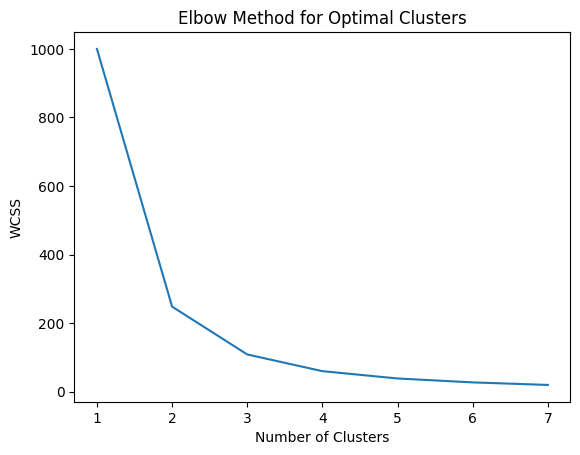

In [ ]:
plt.figure()
plt.plot(range(1, 8), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [ ]:
df.groupby('Cluster').mean()


,Price,Discount,Marketing_Spend,Units_Sold,Date_01-01-2024,Date_01-01-2025,Date_01-02-2023,Date_01-02-2024,Date_01-02-2025,Date_01-03-2023,...,Date_31-10-2023,Date_31-10-2024,Date_31-12-2023,Date_31-12-2024,Product_Category_Fashion,Product_Category_Home Decor,Product_Category_Sports,Product_Category_Toys,Customer_Segment_Premium,Customer_Segment_Regular
Cluster,,,,,,,,,,,,,,,,,,,,,
0,838.698091,25.472273,4738.106606,29.900000,0.00000,0.00000,0.000000,0.000000,0.00303,0.00000,...,0.000000,0.00000,0.00303,0.00000,0.187879,0.178788,0.230303,0.206061,0.321212,0.321212
1,165.454000,24.292909,4889.658061,29.669697,0.00303,0.00303,0.000000,0.000000,0.00000,0.00303,...,0.000000,0.00303,0.00000,0.00303,0.172727,0.193939,0.209091,0.203030,0.342424,0.351515
2,511.387441,24.991882,5104.905588,29.332353,0.00000,0.00000,0.002941,0.002941,0.00000,0.00000,...,0.002941,0.00000,0.00000,0.00000,0.208824,0.197059,0.179412,0.202941,0.285294,0.361765


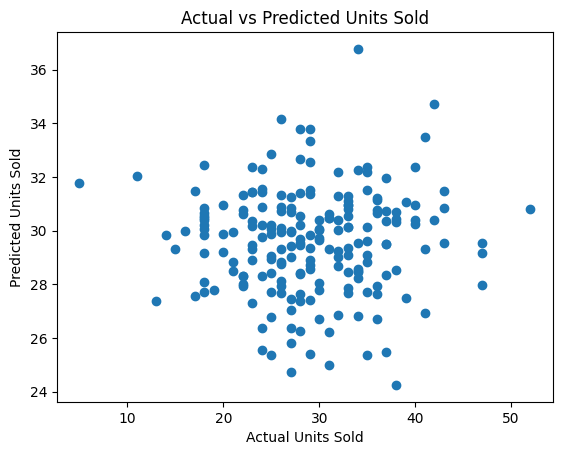

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Units Sold")
plt.show()


In [ ]:
importance = rf.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

feature_df.head(10)


,Feature,Importance
2,Marketing_Spend,0.131773
0,Price,0.122466
1,Discount,0.109756
96,Date_03-10-2024,0.018040
1006,Customer_Segment_Premium,0.014591
1005,Product_Category_Toys,0.010211
1007,Customer_Segment_Regular,0.010156
731,Date_23-02-2023,0.009852
608,Date_19-05-2023,0.009665
1004,Product_Category_Sports,0.009451


In [ ]:
sample = X_test[0].reshape(1, -1)
prediction = rf.predict(sample)

print("Predicted Units Sold:", prediction[0])


Predicted Units Sold: 27.985
